# 데이터 로드

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# colab에 Mecab설치
!git clone https://github.com/SOMJANG/Mecab-ko-for-Google-Colab.git

Cloning into 'Mecab-ko-for-Google-Colab'...
remote: Enumerating objects: 91, done.
remote: Counting objects: 100% (91/91), done.
remote: Compressing objects: 100% (85/85), done.
remote: Total 91 (delta 43), reused 22 (delta 6), pack-reused 0
Unpacking objects: 100% (91/91), done.


In [3]:
%cd Mecab-ko-for-Google-Colab

/content/Mecab-ko-for-Google-Colab


In [4]:
!bash install_mecab-ko_on_colab190912.sh

Installing konlpy.....
     |████████████████████████████████| 19.4 MB 8.4 MB/s 
     |████████████████████████████████| 448 kB 71.8 MB/s 
     |████████████████████████████████| 86 kB 7.6 MB/s 
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.6.3
    Uninstalling beautifulsoup4-4.6.3:
      Successfully uninstalled beautifulsoup4-4.6.3
Done
Installing mecab-0.996-ko-0.9.2.tar.gz.....
from https://bitbucket.org/eunjeon/mecab-ko/downloads/mecab-0.996-ko-0.9.2.tar.gz
--2021-08-09 00:47:12--  https://bitbucket.org/eunjeon/mecab-ko/downloads/mecab-0.996-ko-0.9.2.tar.gz
Resolving bitbucket.org (bitbucket.org)... 104.192.141.1, 2406:da00:ff00::22c3:9b0a, 2406:da00:ff00::34cc:ea4a, ...
Connecting to bitbucket.org (bitbucket.org)|104.192.141.1|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://bbuseruploads.s3.amazonaws.com/eunjeon/mecab-ko/downloads/mecab-0.996-ko-0.9.2.tar.gz?Signature=eo8mEQ7mjx66Hy%2BNaLZbkVYXFGY%3

In [12]:
%cd /content/drive/MyDrive/Colab Notebooks/NLP_Classification/sentiment/Clean Dataset

/content/drive/MyDrive/Colab Notebooks/NLP_Classification/sentiment/Clean Dataset


In [13]:
# 필요 프레임워크 및 라이브러리 준비
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import re
import urllib.request
from konlpy.tag import Mecab
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# 데이터 로드

In [ ]:
# 사전에 정제+정규화된 훈련용 통합 데이터 로드
total_data = pd.read_table('clean_total_data(app&cosmetic&movie&shopping&game).txt')

In [ ]:
print(len(total_data))
total_data.head()

499643


,document,label
0,첫 독립영화 그리고 독립영화에 빠지다,1
1,횡령죄가 아니라 배임죄인것 중요합니다 참고로 예금에서 인출한것이 배임이 아니라 협력...,1
2,는 기억할것입니다 응다죽어,0
3,괜히 샀다 나도 모르는사이 틀딱 감성 다 사라졌네 ㅋㅋ 추억보정이 부족하다,0
4,재구매 부모님과 할머니 맛있게 드시라고 보내드렸습니다 부모님이 저번에 보내드린것이 ...,1


In [ ]:
total_data_10 = pd.read_table('clean_total_data(app&cosmetic&movie&shopping&game)_10.txt')

In [ ]:
print(len(total_data_10))
total_data_10.head()

490079


,document,label
0,뭔 재미인지 모르겠다,0
1,짱재밌고 추천해요그럼 잘보세요,1
2,허접한 스토리이해불가능한 퍼즐 이렇게 재미없는 게임은 처음본다,0
3,여러 해 째 먹고 있습니다 기침 날 때 한 스푼 씩 떠먹습니다 부모님께도 사드려서 ...,1
4,점도 아까운 영화 보고나면 기분이 더러워진다,0


In [ ]:
total_data_25 = pd.read_table('clean_total_data(app&cosmetic&movie&shopping&game)_25.txt')

In [ ]:
print(len(total_data_25))
total_data_25.head()

491673


,document,label
0,한번빨았더니 쫄티됐는데요,0
1,장르 선택 잘못됐다 이건 코미디물 연기도 참,0
2,프랑스 영화는 역시 너무 서정적이야 뭔가 파격이 필요할 텐데,1
3,찍힌거보냈네요 저부분은 배송중 찍힐수도 없는부분인데 의자마감상태도 그리 좋진않아요 ...,0
4,재구매 항상 이집에서만 구매해요 좋아요,1


In [ ]:
total_data_50 = pd.read_table('clean_total_data(app&cosmetic&movie&shopping&game)_50.txt')

In [ ]:
print(len(total_data_50))
total_data_50.head()

494330


,document,label
0,스텐보다는 묵직하지만 얼룩안생기고 이뻐요,1
1,일반적인 형태의 전략 시뮬레이션 게임을 좋아하신다면 재미있게 하실수 있습니다 다...,1
2,역대급 개꿀잼 하 시즌 나와라,1
3,그릇 디자인예쁘고 마음에 들어요 컵은 별로 필요없었지만 파스타 그릇 함께 구매하려고...,0
4,갑자기 왜 두개로 쪼게놓은건지 이해안가는부분 ㅇㅈ 어 ㅇㅈ,1


In [ ]:
total_data_5X = pd.read_table('clean_total_data(app&cosmetic&movie&shopping&game)_5X.txt')

In [ ]:
print(len(total_data_5X))
total_data_5X.head()

542151


,document,label
0,이 속바지를 왜 샀나싶네여 안장통땜에 샀는데 전혀 도움이 되지 않았구요 속바지 자체...,0
1,미친 여자가 분수에 발담그고 외계인과 대화하는 영화,0
2,요즘 참 인도 바라나시가 가고싶다 시바 인생을 던져 를 보고 나니 더욱 그렇다 한동...,1
3,탄막리듬겜 어렵지만 동체시력 기를땐 최고 노래도 짱이다 리게이는 필수 ㅋㅋ,1
4,맛있어요 저만 맛있는게 아닌가봐요 종종 물량 없어서 하루정도 배송 늦어질 때 있어요...,1


In [15]:
total_data_10X = pd.read_table('clean_total_data(app_cosmetic_movie_shopping_game)_10X.txt')

In [16]:
print(len(total_data_10X))
total_data_10X.head()

595286


,document,label
0,잘먹고 있어요 또 구입할게요,1
1,정말 접착력은 최고입니다,1
2,이건 좀 제 입맛에는 별로였어요,0
3,아니 왜 실행안되요,0
4,여러 사람이 동시에 접속하여 의사소통 할 수 있는 점이 가장 마음에 든다 특히 해외...,1


# 토큰화

In [17]:
# 불용어 정의 (한국어 조사, 접속사 등) 
stopwords = ['의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다']

In [18]:
mecab = Mecab()

In [ ]:
# 훈련데이터에 형태소 분석기를 사용하여 토큰화를 하면서 불용어 제거
X_total = []
for sentence in total_data['document']:
    temp_X = mecab.morphs(sentence) # 토큰화
    temp_X = [word for word in temp_X if not word in stopwords] # 불용어 제거
    X_total.append(temp_X)

In [ ]:
print(len(total_data))
total_data.head()

499643


,document,label
0,첫 독립영화 그리고 독립영화에 빠지다,1
1,횡령죄가 아니라 배임죄인것 중요합니다 참고로 예금에서 인출한것이 배임이 아니라 협력...,1
2,는 기억할것입니다 응다죽어,0
3,괜히 샀다 나도 모르는사이 틀딱 감성 다 사라졌네 ㅋㅋ 추억보정이 부족하다,0
4,재구매 부모님과 할머니 맛있게 드시라고 보내드렸습니다 부모님이 저번에 보내드린것이 ...,1


In [ ]:
X_total_10 = []
for sentence in total_data_10['document']:
    temp_X = mecab.morphs(sentence) # 토큰화
    temp_X = [word for word in temp_X if not word in stopwords] # 불용어 제거
    X_total_10.append(temp_X)
print(len(total_data_10))
total_data_10.head()

490079


,document,label
0,뭔 재미인지 모르겠다,0
1,짱재밌고 추천해요그럼 잘보세요,1
2,허접한 스토리이해불가능한 퍼즐 이렇게 재미없는 게임은 처음본다,0
3,여러 해 째 먹고 있습니다 기침 날 때 한 스푼 씩 떠먹습니다 부모님께도 사드려서 ...,1
4,점도 아까운 영화 보고나면 기분이 더러워진다,0


In [ ]:
X_total_25 = []
for sentence in total_data_25['document']:
    temp_X = mecab.morphs(sentence) # 토큰화
    temp_X = [word for word in temp_X if not word in stopwords] # 불용어 제거
    X_total_25.append(temp_X)
print(len(total_data_25))
total_data_25.head()

491673


,document,label
0,한번빨았더니 쫄티됐는데요,0
1,장르 선택 잘못됐다 이건 코미디물 연기도 참,0
2,프랑스 영화는 역시 너무 서정적이야 뭔가 파격이 필요할 텐데,1
3,찍힌거보냈네요 저부분은 배송중 찍힐수도 없는부분인데 의자마감상태도 그리 좋진않아요 ...,0
4,재구매 항상 이집에서만 구매해요 좋아요,1


In [ ]:
X_total_50 = []
for sentence in total_data_50['document']:
    temp_X = mecab.morphs(sentence) # 토큰화
    temp_X = [word for word in temp_X if not word in stopwords] # 불용어 제거
    X_total_50.append(temp_X)
print(len(total_data_50))
total_data_50.head()

494330


,document,label
0,스텐보다는 묵직하지만 얼룩안생기고 이뻐요,1
1,일반적인 형태의 전략 시뮬레이션 게임을 좋아하신다면 재미있게 하실수 있습니다 다...,1
2,역대급 개꿀잼 하 시즌 나와라,1
3,그릇 디자인예쁘고 마음에 들어요 컵은 별로 필요없었지만 파스타 그릇 함께 구매하려고...,0
4,갑자기 왜 두개로 쪼게놓은건지 이해안가는부분 ㅇㅈ 어 ㅇㅈ,1


In [ ]:
X_total_5X = []
for sentence in total_data_5X['document']:
    temp_X = mecab.morphs(sentence) # 토큰화
    temp_X = [word for word in temp_X if not word in stopwords] # 불용어 제거
    X_total_5X.append(temp_X)
print(len(total_data_5X))
total_data_5X.head()

542151


,document,label
0,이 속바지를 왜 샀나싶네여 안장통땜에 샀는데 전혀 도움이 되지 않았구요 속바지 자체...,0
1,미친 여자가 분수에 발담그고 외계인과 대화하는 영화,0
2,요즘 참 인도 바라나시가 가고싶다 시바 인생을 던져 를 보고 나니 더욱 그렇다 한동...,1
3,탄막리듬겜 어렵지만 동체시력 기를땐 최고 노래도 짱이다 리게이는 필수 ㅋㅋ,1
4,맛있어요 저만 맛있는게 아닌가봐요 종종 물량 없어서 하루정도 배송 늦어질 때 있어요...,1


In [19]:
X_total_10X = []
for sentence in total_data_10X['document']:
    temp_X = mecab.morphs(sentence) # 토큰화
    temp_X = [word for word in temp_X if not word in stopwords] # 불용어 제거
    X_total_10X.append(temp_X)
print(len(X_total_10X))
X_total_10X[:3]

595286


[['먹', '고', '있', '어요', '또', '구입', '할게요'],
 ['정말', '접착력', '최고', '입니다'],
 ['이건', '제', '입맛', '별로', '였어요']]

In [ ]:
# 토큰화가 오래걸리므로, 반복작업이 용이하도록 파일로 추출해두자
import json
json = json.dumps(X_total_10X, ensure_ascii=False)
tokened_vocab = open("7_KoNLPy(Mecab)_stopwords(18)_Total(movie&shopping&game&target)_tokened_vocab_v3.0.json", "w", encoding="utf-8")
tokened_vocab.write(json)
tokened_vocab.close()

# 정수 인코딩

In [ ]:
# 기계가 텍스트를 숫자로 처리할 수 있도록 데이터를 정수로 변환
# 일단 단어 집합을 만들자
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_total)
 # fit_on_texts()안에 코퍼스를 입력으로 하면 빈도수를 기준으로 단어 집합을 생성한다.
 # 단어 빈도수가 높은순으로 낮은 정수 인덱스 부여

In [ ]:
# 등장 빈도수가 낮은 데이터를 처리해보자
# 특정 횟수 이하 단어의 비중이 몇인지 체크
threshold = 41
total_cnt = len(tokenizer.word_index) # 단어의 수
rare_cnt = 0 # 등장 빈도수가 threshold보다 작은 단어의 개수를 카운트
total_freq = 0 # 훈련 데이터의 전체 단어 빈도수 총 합
rare_freq = 0 # 등장 빈도수가 threshold보다 작은 단어의 등장 빈도수의 총 합

# 단어와 빈도수의 쌍(pair)을 key와 value로 받는다.
for key, value in tokenizer.word_counts.items():
    total_freq = total_freq + value

    # 단어의 등장 빈도수가 threshold보다 작으면
    if(value < threshold):
        rare_cnt = rare_cnt + 1
        rare_freq = rare_freq + value

print('단어 집합(vocabulary)의 크기 :',total_cnt)
print('등장 빈도가 %s번 이하인 희귀 단어의 수: %s'%(threshold - 1, rare_cnt))
print("단어 집합에서 희귀 단어의 비율:", (rare_cnt / total_cnt)*100)
print("전체 등장 빈도에서 희귀 단어 등장 빈도 비율:", (rare_freq / total_freq)*100)

단어 집합(vocabulary)의 크기 : 90450
등장 빈도가 40번 이하인 희귀 단어의 수: 81214
단어 집합에서 희귀 단어의 비율: 89.78883360972914
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 4.920747563266566


In [ ]:
# 전체 단어 개수 중 빈도수 12이하인 단어는 제거.
# 0번 패딩 토큰을 고려하여 + 1
vocab_size = total_cnt - rare_cnt + 2
print('단어 집합의 크기 :',vocab_size)

단어 집합의 크기 : 9237


In [ ]:
# 단어집합을 케라스 토크나이저의 인자로 넘겨주면, 케라스 토크나이저는 텍스트 시퀀스를 숫자 시퀀스로 변환
#Tokenizer메서드에 숫자를 입력하면 빈도수가 높은 상위 몇개 단어만 사용
tokenizer = Tokenizer(num_words = vocab_size +2, oov_token ='OOV')
# 빈도수 상위 vocab_size단어만 사용, 숫자 0과 OOV를 고려해서 단어 집합의 크기는 +2
tokenizer.fit_on_texts(X_total)
# 여기까지는 보캡길이가 적용안된 것처럼 보임, 실제 적용은 text_to_sequences사용시 적용됨
X_total = tokenizer.texts_to_sequences(X_total)

# vocab_size로 지정한 단어만 보존하고 싶을 때, 굳이 안해도됨
# words_frequency = [w for w,c in tokenizer.word_index.items() if c >= vocab_size + 1] # 인덱스가 5 초과인 단어 제거
# for w in words_frequency:
#     del tokenizer.word_index[w] # 해당 단어에 대한 인덱스 정보를 삭제
#     del tokenizer.word_counts[w] # 해당 단어에 대한 카운트 정보를 삭제

# 정수인코딩 결과 확인
print(len(tokenizer.word_index))
print(tokenizer.word_index)
print(tokenizer.word_counts)

# 빈도수 상위 vocabsize개수의 단어는 2 ~ vocabsize+1까지의 인덱스를 가졌으며, 그 외 단어 집합에 없는 단어들은 전부 'OOV'의 인덱스인 1로 인코딩
# 케라스 토크나이저는 기본적으로 'OOV'의 인덱스를 1로 지정
# print('단어 OOV의 인덱스 : {}'.format(tokenizer.word_index['OOV']))

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [ ]:
y_total = np.array(total_data['label'])

In [ ]:
tokenizer_10 = Tokenizer()
tokenizer_10.fit_on_texts(X_total_10)
tokenizer_10 = Tokenizer(num_words = vocab_size +2, oov_token ='OOV')
tokenizer_10.fit_on_texts(X_total_10)
X_total_10 = tokenizer_10.texts_to_sequences(X_total_10)
y_total_10 = np.array(total_data_10['label'])

In [ ]:
tokenizer_25 = Tokenizer()
tokenizer_25.fit_on_texts(X_total_25)
tokenizer_25 = Tokenizer(num_words = vocab_size +2, oov_token ='OOV')
tokenizer_25.fit_on_texts(X_total_25)
X_total_25 = tokenizer_25.texts_to_sequences(X_total_25)
y_total_25 = np.array(total_data_25['label'])

In [ ]:
tokenizer_50 = Tokenizer()
tokenizer_50.fit_on_texts(X_total_50)
tokenizer_50 = Tokenizer(num_words = vocab_size +2, oov_token ='OOV')
tokenizer_50.fit_on_texts(X_total_50)
X_total_50 = tokenizer_50.texts_to_sequences(X_total_50)
y_total_50 = np.array(total_data_50['label'])

In [ ]:
tokenizer_5X = Tokenizer()
tokenizer_5X.fit_on_texts(X_total_5X)
tokenizer_5X = Tokenizer(num_words = vocab_size +2, oov_token ='OOV')
tokenizer_5X.fit_on_texts(X_total_5X)
X_total_5X = tokenizer_5X.texts_to_sequences(X_total_5X)
y_total_5X = np.array(total_data_5X['label'])

In [20]:
# 정수 인코딩
tokenizer_10X = Tokenizer()
tokenizer_10X.fit_on_texts(X_total_10X)

In [21]:
# 등장 빈도수가 낮은 데이터를 처리해보자
# 특정 횟수 이하 단어의 비중이 몇인지 체크
threshold = 56
total_cnt = len(tokenizer_10X.word_index) # 단어의 수
rare_cnt = 0 # 등장 빈도수가 threshold보다 작은 단어의 개수를 카운트
total_freq = 0 # 훈련 데이터의 전체 단어 빈도수 총 합
rare_freq = 0 # 등장 빈도수가 threshold보다 작은 단어의 등장 빈도수의 총 합

# 단어와 빈도수의 쌍(pair)을 key와 value로 받는다.
for key, value in tokenizer_10X.word_counts.items():
    total_freq = total_freq + value

    # 단어의 등장 빈도수가 threshold보다 작으면
    if(value < threshold):
        rare_cnt = rare_cnt + 1
        rare_freq = rare_freq + value

print('단어 집합(vocabulary)의 크기 :',total_cnt)
print('등장 빈도가 %s번 이하인 희귀 단어의 수: %s'%(threshold - 1, rare_cnt))
print("단어 집합에서 희귀 단어의 비율:", (rare_cnt / total_cnt)*100)
print("전체 등장 빈도에서 희귀 단어 등장 빈도 비율:", (rare_freq / total_freq)*100)

단어 집합(vocabulary)의 크기 : 90450
등장 빈도가 55번 이하인 희귀 단어의 수: 82335
단어 집합에서 희귀 단어의 비율: 91.02819237147595
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 4.826350153630962


In [22]:
# 전체 단어 개수 중 빈도수 12이하인 단어는 제거.
# 0번 패딩 토큰 및 oov를 고려하여 + 2
vocab_size = total_cnt - rare_cnt + 2
print('단어 집합의 크기 :',vocab_size)

단어 집합의 크기 : 8117


In [ ]:
# 정수인코딩이 오래걸리므로, 반복작업이 용이하도록 파일로 추출해두자
import json
vocab = tokenizer_10X.word_index
json = json.dumps(vocab, ensure_ascii=False)
vocab = open("7_KoNLPy(Mecab)_stopwords(18)_Total(movie&shopping&game&target10X)_indexed_vocab_v3.0.json", "w", encoding="utf-8")
vocab.write(json)
vocab.close()

In [23]:
tokenizer_10X = Tokenizer(vocab_size, oov_token ='OOV')
tokenizer_10X.fit_on_texts(X_total_10X)
X_total_10X = tokenizer_10X.texts_to_sequences(X_total_10X)
y_total_10X = np.array(total_data_10X['label'])

In [24]:
print(len(X_total_10X))
X_total_10X[:3]

595286


[[68, 2, 9, 12, 158, 212, 829],
 [55, 1646, 111, 63],
 [221, 146, 2059, 97, 3821]]

# 빈 샘플(empty samples)제거

In [ ]:
# 각 샘플의 길이가 0인 샘플들의 인덱스 확인
drop_total = [index for index, sentence in enumerate(X_total) if len(sentence) < 1]
print(drop_total)

[111, 153366, 207905, 324482, 328470, 337454, 364931, 385044, 401899, 449326, 453754, 471860, 495919]


In [ ]:
# 빈 샘플들을 제거
X_total = np.delete(X_total, drop_total, axis=0)
y_total = np.delete(y_total, drop_total, axis=0)
print(len(X_total))
print(len(y_total))

499630
499630


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


In [ ]:
drop_total_10 = [index for index, sentence in enumerate(X_total_10) if len(sentence) < 1]
X_total_10 = np.delete(X_total_10, drop_total_10, axis=0)
y_total_10 = np.delete(y_total_10, drop_total_10, axis=0)

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


In [ ]:
drop_total_25 = [index for index, sentence in enumerate(X_total_25) if len(sentence) < 1]
X_total_25 = np.delete(X_total_25, drop_total_25, axis=0)
y_total_25 = np.delete(y_total_25, drop_total_25, axis=0)

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


In [ ]:
drop_total_50 = [index for index, sentence in enumerate(X_total_50) if len(sentence) < 1]
X_total_50 = np.delete(X_total_50, drop_total_50, axis=0)
y_total_50 = np.delete(y_total_50, drop_total_50, axis=0)

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


In [ ]:
drop_total_5X = [index for index, sentence in enumerate(X_total_5X) if len(sentence) < 1]
X_total_5X = np.delete(X_total_5X, drop_total_5X, axis=0)
y_total_5X = np.delete(y_total_5X, drop_total_5X, axis=0)

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


In [25]:
drop_total_10X = [index for index, sentence in enumerate(X_total_10X) if len(sentence) < 1]
X_total_10X = np.delete(X_total_10X, drop_total_10X, axis=0)
y_total_10X = np.delete(y_total_10X, drop_total_10X, axis=0)

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


# 패딩

In [ ]:
# 서로 다른 길이의 샘플들의 길이를 동일하게 맞춰는 작업
# 전체 데이터에서 가장 길이가 긴 리뷰와, 전체의 길이분포를 알아보자
print('리뷰의 최대 길이 :',max(len(l) for l in X_total)
print('리뷰의 평균 길이 :',sum(map(len, X_total))/len(X_total))
plt.hist([len(s) for s in X_total], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

NameError: ignored

In [ ]:
# 최적의 길이를 찾기 위해, 전체 샘플중 길이가 max_len 이하인 샘플의 비율을 확인하는 함수 생성
def below_threshold_len(max_len, nested_list):
  cnt = 0
  for s in nested_list:
    if(len(s) <= max_len):
        cnt = cnt + 1
  print('전체 샘플 중 길이가 %s 이하인 샘플의 비율: %s'%(max_len, (cnt / len(nested_list))*100))

In [ ]:
max_len = 45

In [ ]:
# 길이별 비율 체크max_len = 45
below_threshold_len(max_len, X_total)

전체 샘플 중 길이가 45 이하인 샘플의 비율: 96.18317554990693


In [ ]:
# 짧은 데이터는 0을 채우고, 최적길이를 데이터는 손실됨
X_total = pad_sequences(X_total, maxlen = max_len)

In [ ]:
X_total_10 = pad_sequences(X_total_10, maxlen = max_len)
X_total_25 = pad_sequences(X_total_25, maxlen = max_len)
X_total_50 = pad_sequences(X_total_50, maxlen = max_len)
X_total_5X = pad_sequences(X_total_5X, maxlen = max_len)

리뷰의 최대 길이 : 86
리뷰의 평균 길이 : 16.669879198283812


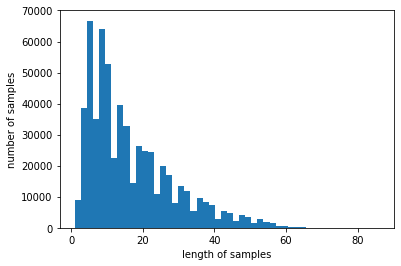

In [ ]:
# 서로 다른 길이의 샘플들의 길이를 동일하게 맞춰는 작업
# 전체 데이터에서 가장 길이가 긴 리뷰와, 전체의 길이분포를 알아보자
print('리뷰의 최대 길이 :', max(len(l) for l in X_total_10X))
print('리뷰의 평균 길이 :', sum(map(len, X_total_10X))/len(X_total_10X))
plt.hist([len(s) for s in X_total_10X], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [ ]:
# 길이별 비율 체크
max_len = 40
below_threshold_len(max_len, X_total_10X)

전체 샘플 중 길이가 40 이하인 샘플의 비율: 94.49445884493333


In [26]:
max_len = 40
X_total_10X = pad_sequences(X_total_10X, maxlen = max_len)

In [ ]:
# 넘파이 배열로 변환하는 함수
import json
class NumpyEncoder(json.JSONEncoder):
    def default(self, obj):
        if isinstance(obj, np.ndarray):
            return obj.tolist()
        return json.JSONEncoder.default(self, obj)

In [ ]:
# json 저장
import json
json_dump = json.dumps(X_total_10X, cls=NumpyEncoder)
padded_vocab = open("KoNLPy(Mecab)_train(movie&shopping&game&target10X)_padded_vocab_v3.1.json", "w", encoding="utf-8")
padded_vocab.write(json_dump)
padded_vocab.close()

In [27]:
X_total_10X [:3]

array([[   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          68,    2,    9,   12,  158,  212,  829],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,   55, 1646,  111,   63],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,  221,  146, 2059,   97, 3821]], dtype=int32)

# 모델 훈련

In [28]:
# 필요한 프레임워크 및 라이브러리 임포트
from tensorflow.keras.layers import Embedding, Dense, LSTM, Bidirectional
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [29]:
# 필요한 매트릭 선언, AUC-ROC, F1-Score, AUC-PR 에 필요한 지표 모두 체크
import tensorflow as tf
ROCauc = tf.keras.metrics.AUC(curve="ROC") # auc_1
PRauc = tf.keras.metrics.AUC(curve="PR") # auc_2
# RECALL = tf.keras.metrics.Recall()
# PRECISION = tf.keras.metrics.Precision()
TP = tf.keras.metrics.TruePositives()
TN = tf.keras.metrics.TrueNegatives()
FP = tf.keras.metrics.FalsePositives()
FN = tf.keras.metrics.FalseNegatives()

In [30]:
model_BiLSTM = Sequential()
model_BiLSTM.add(Embedding(vocab_size, 100))
model_BiLSTM.add(Bidirectional(LSTM(128)))
model_BiLSTM.add(Dense(1, activation='sigmoid'))

In [31]:
# 검증 데이터 손실이 4회 증가하면 학습 조기 종료
# model check point를 사용하여 검증 데이터의 정확도가 이전보다 좋아질 경우만 모델 저장
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=4)
model_BiLSTM.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc', ROCauc, PRauc, TP, TN, FP, FN])

In [ ]:
# BiLSTM모델 훈련
mc_BiLSTM = ModelCheckpoint('RNN_BiLSTM_KoNLPy(Mecab)_Total(movie&shopping&game&target)_v0.1.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)
history = model_BiLSTM.fit(X_total, y_total, epochs=15, callbacks=[es, mc_BiLSTM], batch_size=100, validation_split=0.2)

Epoch 1/15
3998/3998 [==============================] - 77s 17ms/step - loss: 0.3630 - acc: 0.8406 - auc: 0.9186 - auc_1: 0.9170 - precision: 0.8472 - recall: 0.8344 - true_positives: 168238.0000 - true_negatives: 167747.0000 - false_positives: 30336.0000 - false_negatives: 33383.0000 - val_loss: 0.3436 - val_acc: 0.8516 - val_auc: 0.9317 - val_auc_1: 0.9296 - val_precision: 0.8308 - val_recall: 0.8846 - val_true_positives: 44388.0000 - val_true_negatives: 40705.0000 - val_false_positives: 9040.0000 - val_false_negatives: 5793.0000

Epoch 00001: val_acc improved from -inf to 0.85156, saving model to RNN_BiLSTM_KoNLPy(Mecab)_Total(movie&shopping&game&target)_v0.1.h5
Epoch 2/15
3998/3998 [==============================] - 69s 17ms/step - loss: 0.3113 - acc: 0.8676 - auc: 0.9405 - auc_1: 0.9394 - precision: 0.8723 - recall: 0.8639 - true_positives: 174190.0000 - true_negatives: 172590.0000 - false_positives: 25493.0000 - false_negatives: 27431.0000 - val_loss: 0.3145 - val_acc: 0.8664 - v

In [ ]:
mc_BiLSTM10 = ModelCheckpoint('RNN_BiLSTM10_KoNLPy(Mecab)_Total(movie&shopping&game&target)_v0.1.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)
history = model_BiLSTM.fit(X_total_10, y_total_10, epochs=15, callbacks=[es, mc_BiLSTM10], batch_size=100, validation_split=0.2)

Epoch 1/15
3921/3921 [==============================] - 66s 17ms/step - loss: 0.3822 - acc: 0.8259 - auc: 0.9088 - auc_1: 0.9084 - precision: 0.8339 - recall: 0.8143 - true_positives: 159759.0000 - true_negatives: 164043.0000 - false_positives: 31827.0000 - false_negatives: 36423.0000 - val_loss: 0.3247 - val_acc: 0.8609 - val_auc: 0.9354 - val_auc_1: 0.9349 - val_precision: 0.8738 - val_recall: 0.8429 - val_true_positives: 41221.0000 - val_true_negatives: 43157.0000 - val_false_positives: 5953.0000 - val_false_negatives: 7683.0000

Epoch 00001: val_acc improved from -inf to 0.86088, saving model to RNN_BiLSTM10_KoNLPy(Mecab)_Total(movie&shopping&game&target)_v0.1.h5
Epoch 2/15
3921/3921 [==============================] - 66s 17ms/step - loss: 0.3074 - acc: 0.8692 - auc: 0.9420 - auc_1: 0.9401 - precision: 0.8730 - recall: 0.8643 - true_positives: 169555.0000 - true_negatives: 171203.0000 - false_positives: 24667.0000 - false_negatives: 26627.0000 - val_loss: 0.3088 - val_acc: 0.8700 -

In [ ]:
mc_BiLSTM25 = ModelCheckpoint('RNN_BiLSTM25_KoNLPy(Mecab)_Total(movie&shopping&game&target)_v0.1.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)
history = model_BiLSTM.fit(X_total_25, y_total_25, epochs=15, callbacks=[es, mc_BiLSTM25], batch_size=100, validation_split=0.2)

Epoch 1/15
3934/3934 [==============================] - 67s 17ms/step - loss: 0.3788 - acc: 0.8272 - auc: 0.9105 - auc_1: 0.9111 - precision: 0.8360 - recall: 0.8146 - true_positives: 160353.0000 - true_negatives: 165014.0000 - false_positives: 31466.0000 - false_negatives: 36495.0000 - val_loss: 0.3238 - val_acc: 0.8606 - val_auc: 0.9357 - val_auc_1: 0.9345 - val_precision: 0.8620 - val_recall: 0.8600 - val_true_positives: 42456.0000 - val_true_negatives: 42168.0000 - val_false_positives: 6798.0000 - val_false_negatives: 6910.0000

Epoch 00001: val_acc improved from -inf to 0.86059, saving model to RNN_BiLSTM25_KoNLPy(Mecab)_Total(movie&shopping&game&target)_v0.1.h5
Epoch 2/15
3934/3934 [==============================] - 66s 17ms/step - loss: 0.3003 - acc: 0.8728 - auc: 0.9448 - auc_1: 0.9435 - precision: 0.8766 - recall: 0.8681 - true_positives: 170893.0000 - true_negatives: 172419.0000 - false_positives: 24061.0000 - false_negatives: 25955.0000 - val_loss: 0.3105 - val_acc: 0.8670 -

In [ ]:
mc_BiLSTM50 = ModelCheckpoint('RNN_BiLSTM50_KoNLPy(Mecab)_Total(movie&shopping&game&target)_v0.1.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)
history = model_BiLSTM.fit(X_total_50, y_total_50, epochs=15, callbacks=[es, mc_BiLSTM50], batch_size=100, validation_split=0.2)

Epoch 1/15
3955/3955 [==============================] - 66s 17ms/step - loss: 0.4088 - acc: 0.8122 - auc: 0.8954 - auc_1: 0.8971 - precision: 0.8228 - recall: 0.7981 - true_positives: 158620.0000 - true_negatives: 162554.0000 - false_positives: 34152.0000 - false_negatives: 40127.0000 - val_loss: 0.3419 - val_acc: 0.8535 - val_auc: 0.9293 - val_auc_1: 0.9285 - val_precision: 0.8749 - val_recall: 0.8240 - val_true_positives: 40632.0000 - val_true_negatives: 43744.0000 - val_false_positives: 5808.0000 - val_false_negatives: 8680.0000

Epoch 00001: val_acc improved from -inf to 0.85346, saving model to RNN_BiLSTM50_KoNLPy(Mecab)_Total(movie&shopping&game&target)_v0.1.h5
Epoch 2/15
3955/3955 [==============================] - 66s 17ms/step - loss: 0.3124 - acc: 0.8672 - auc: 0.9402 - auc_1: 0.9390 - precision: 0.8716 - recall: 0.8628 - true_positives: 171482.0000 - true_negatives: 171439.0000 - false_positives: 25267.0000 - false_negatives: 27265.0000 - val_loss: 0.3191 - val_acc: 0.8645 -

In [ ]:
mc_BiLSTM5X = ModelCheckpoint('7_RNN_BiLSTM5X_KoNLPy(Mecab)_Total(movie&shopping&game&target)_v0.1.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)
history = model_BiLSTM.fit(X_total_5X, y_total_5X, epochs=15, callbacks=[es, mc_BiLSTM5X], batch_size=100, validation_split=0.2)

Epoch 1/15
4338/4338 [==============================] - 83s 18ms/step - loss: 0.3605 - acc: 0.8411 - auc: 0.9196 - auc_1: 0.9228 - precision: 0.8504 - recall: 0.8422 - true_positives: 189756.0000 - true_negatives: 175018.0000 - false_positives: 33370.0000 - false_negatives: 35566.0000 - val_loss: 0.3244 - val_acc: 0.8592 - val_auc: 0.9355 - val_auc_1: 0.9396 - val_precision: 0.8625 - val_recall: 0.8671 - val_true_positives: 48823.0000 - val_true_negatives: 44343.0000 - val_false_positives: 7781.0000 - val_false_negatives: 7481.0000

Epoch 00001: val_acc improved from -inf to 0.85924, saving model to 7_RNN_BiLSTM50_KoNLPy(Mecab)_Total(movie&shopping&game&target)_v0.1.h5
Epoch 2/15
4338/4338 [==============================] - 73s 17ms/step - loss: 0.3062 - acc: 0.8691 - auc: 0.9424 - auc_1: 0.9452 - precision: 0.8783 - recall: 0.8684 - true_positives: 195667.0000 - true_negatives: 181272.0000 - false_positives: 27116.0000 - false_negatives: 29655.0000 - val_loss: 0.3192 - val_acc: 0.8626

In [32]:
mc_BiLSTM10X = ModelCheckpoint('7_RNN_BiLSTM10X_KoNLPy(Mecab)_Total(movie&shopping&game&target)_v3.2.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)
history = model_BiLSTM.fit(X_total_10X, y_total_10X, epochs=15, callbacks=[es, mc_BiLSTM10X], batch_size=100, validation_split=0.2)

Epoch 1/15
4763/4763 [==============================] - 81s 16ms/step - loss: 0.3520 - acc: 0.8440 - auc: 0.9231 - auc_1: 0.9322 - true_positives: 216774.0000 - true_negatives: 185154.0000 - false_positives: 35770.0000 - false_negatives: 38520.0000 - val_loss: 0.3235 - val_acc: 0.8589 - val_auc: 0.9396 - val_auc_1: 0.9470 - val_true_positives: 51953.0000 - val_true_negatives: 50303.0000 - val_false_positives: 5140.0000 - val_false_negatives: 11659.0000

Epoch 00001: val_acc improved from -inf to 0.85890, saving model to 7_RNN_BiLSTM10X_KoNLPy(Mecab)_Total(movie&shopping&game&target)_v3.2.h5
Epoch 2/15
4763/4763 [==============================] - 73s 15ms/step - loss: 0.2927 - acc: 0.8754 - auc: 0.9473 - auc_1: 0.9539 - true_positives: 224170.0000 - true_negatives: 192706.0000 - false_positives: 28218.0000 - false_negatives: 31124.0000 - val_loss: 0.2969 - val_acc: 0.8745 - val_auc: 0.9480 - val_auc_1: 0.9544 - val_true_positives: 54221.0000 - val_true_negatives: 49891.0000 - val_false_

In [37]:
loaded_model = load_model('7_RNN_BiLSTM10X_KoNLPy(Mecab)_Total(movie&shopping&game&target)_v3.2.h5')
def sentiment_predict(new_sentence):
    new_sentence = re.sub(r'[^ㄱ-ㅎㅏ-ㅣ가-힣 ]','', new_sentence)
    new_sentence = mecab.morphs(new_sentence) # 토큰화
    new_sentence = [word for word in new_sentence if not word in stopwords] # 불용어 제거
    encoded = tokenizer_10X.texts_to_sequences([new_sentence]) # 정수 인코딩
    pad_new = pad_sequences(encoded, maxlen = max_len) # 패딩
    score = float(loaded_model.predict(pad_new)) # 예측
    if(score > 0.5):
        print("{:.2f}% 확률로 긍정 리뷰입니다.".format(score * 100))
    else:
        print("{:.2f}% 확률로 부정 리뷰입니다.".format((1 - score) * 100))

In [60]:
sentiment_predict('노잼 ..완전 재미 없음 ㅉㅉ')

99.39% 확률로 부정 리뷰입니다.


In [39]:
sentiment_predict('조금 어렵지만 재밌음ㅋㅋ')

98.70% 확률로 긍정 리뷰입니다.


In [40]:
sentiment_predict('이 상품 진짜 좋아요... 저는 강추합니다. 대박')

99.33% 확률로 긍정 리뷰입니다.


In [41]:
sentiment_predict('진짜 배송도 늦고 개짜증나네요. 뭐 이런 걸 상품이라고 만듬?') #ok

99.74% 확률로 부정 리뷰입니다.


In [42]:
sentiment_predict('ㅁㄴㅇㄻㄴㅇㄻㄴㅇ리뷰쓰기도 귀찮아') #ok

79.65% 확률로 부정 리뷰입니다.


In [43]:
sentiment_predict('이딴게 영화냐 ㅉㅉ') #ok

99.33% 확률로 부정 리뷰입니다.


In [167]:
# 전처리 함수
def sentiment_preprocessing(new_sentence):
    new_sentence = re.sub(r'[^ㄱ-ㅎㅏ-ㅣ가-힣 ]',"", new_sentence)
    # if not str 로 하면 if에서 변수가 공백 및 null값은 false로 반환하므로 비교연산자를 안써도되는데
    # 실제로는 null은 잡는데 공백은 못잡아서 그냥 비교연산자씀
    if not new_sentence or new_sentence.isspace():    # 공백이거나 NUll 인 경우
        return False # 프론트에서 계산에 미포함되도록 (0-1)구간 예외값 리턴
    else :                                            # 공백이거나 NUll 인 아닌 경우
        new_sentence = mecab.morphs(new_sentence) # 토큰화,   "stem =True" 어간 추출(ex 해야지 -> 하다)
        new_sentence = [word for word in new_sentence if not word in stopwords] # 불용어 제거
    
    if not new_sentence : # 불용어 제거 후 빈리스트 인 경우
        return False
    else:
        encoded = tokenizer.texts_to_sequences([new_sentence]) # 정수 인코딩
        encoded = [list(filter(bool, encoded[0]))] # 이중리스트는 필터 안먹음
        padded = pad_sequences(encoded, maxlen = max_len) # 패딩
        return padded

In [91]:
# 예측 함수
def sentiment_predict1(padded_sentence):
    score = loaded_model.predict(padded_sentence)
    return float(score)

In [166]:
def sentiment_model(new_sentence):
    padded_sentence = sentiment_preprocessing(new_sentence)
    if not padded_sentence:
        return float(-1)
    score = sentiment_predict1(padded_sentence)
    return score
    #     #코랩/주피터에서 동작 테스트 코드
    # if(score > 0.5):
    #     print("{:.2f}% 확률로 긍정 리뷰입니다.\n".format(score * 100))
    # else:
    #     print("{:.2f}% 확률로 부정 리뷰입니다.\n".format((1 - score) * 100))
    #     # return score

In [57]:
sentiment_predict('노잼 ..완전 재미 없음 ㅉㅉ')

99.39% 확률로 부정 리뷰입니다.


In [121]:
a = ''
if a == '':
    print('공백', type(a))

공백 <class 'str'>


In [169]:
sentiment_model('')


 <class 'str'>
e
 <class 'str'>


-1.0

In [58]:
sentiment_model('노잼 ..완전 재미 없음 ㅉㅉ')


83.62% 확률로 부정 리뷰입니다.



In [52]:
sentiment_model('조금 어렵지만 재밌음ㅋㅋ')

89.00% 확률로 긍정 리뷰입니다.



In [53]:
sentiment_model('케릭터가 예뻐서 좋아요')

95.00% 확률로 긍정 리뷰입니다.



In [ ]:
sentiment_model('이 상품 진짜 좋아요... 저는 강추합니다. 대박')

99.00% 확률로 부정 리뷰입니다.



In [ ]:
sentiment_model('진짜 배송도 늦고 개짜증나네요. 뭐 이런 걸 상품이라고 만듬?') #ok

50.00% 확률로 부정 리뷰입니다.



In [ ]:
sentiment_model('ㅁㄴㅇㄻㄴㅇㄻㄴㅇ리뷰쓰기도 귀찮아') #ok

50.00% 확률로 부정 리뷰입니다.



# 모델 성능평가

In [ ]:
# 평가용 토탈 데이터셋2(화장품+앱)

# 데이터 로드
total_data2 = pd.read_table('clean_total_data(app&cosmetic).txt')

# 토크나이징
X_test_total2 = []
for sentence in total_data2['document']:
    temp_X2 = mecab.morphs(sentence)
    temp_X2 = [word for word in temp_X2 if not word in stopwords]
    X_test_total2.append(temp_X2)

# 워드 벡터화
tokenizer = Tokenizer(vocab_size)
tokenizer.fit_on_texts(X_test_total2)
X_test_total2 = tokenizer.texts_to_sequences(X_test_total2)

# 패딩
X_test_total2 = pad_sequences(X_test_total2, maxlen = max_len)

# 라벨데이터 포함
y_test_total2 = np.array(total_data2['label'])

In [ ]:
# BiLSTM모델 성능 평가 
loaded_model = load_model('RNN_BiLSTM_KoNLPy(Mecab)_Total(movie&shopping&game&target)_v0.1.h5')
result = loaded_model.evaluate(X_test_total2, y_test_total2, batch_size=100)
print("\n BiLSTM 테스트 결과:",result)

107/107 [==============================] - 2s 8ms/step - loss: 1.0774 - acc: 0.4878 - auc: 0.5283 - auc_1: 0.7096 - precision: 0.7245 - recall: 0.4356 - true_positives: 3248.0000 - true_negatives: 1936.0000 - false_positives: 1235.0000 - false_negatives: 4208.0000

 BiLSTM 테스트 결과: [1.077361822128296, 0.4878140687942505, 0.5283285975456238, 0.7095826864242554, 0.7245148420333862, 0.43562230467796326, 3248.0, 1936.0, 1235.0, 4208.0]


In [ ]:
# BiLSTM모델 성능 평가 
loaded_model = load_model('RNN_BiLSTM10_KoNLPy(Mecab)_Total(movie&shopping&game&target)_v0.1.h5')
result = loaded_model.evaluate(X_test_total2, y_test_total2, batch_size=100)
print("\n BiLSTM10 테스트 결과:",result)

107/107 [==============================] - 2s 8ms/step - loss: 1.1464 - acc: 0.4576 - auc: 0.4877 - auc_1: 0.6845 - precision: 0.6931 - recall: 0.4073 - true_positives: 3037.0000 - true_negatives: 1826.0000 - false_positives: 1345.0000 - false_negatives: 4419.0000

 BiLSTM10 테스트 결과: [1.1464145183563232, 0.4576079845428467, 0.4876840114593506, 0.6845430135726929, 0.6930625438690186, 0.4073229730129242, 3037.0, 1826.0, 1345.0, 4419.0]


In [ ]:
# BiLSTM모델 성능 평가 
loaded_model = load_model('RNN_BiLSTM25_KoNLPy(Mecab)_Total(movie&shopping&game&target)_v0.1.h5')
result = loaded_model.evaluate(X_test_total2, y_test_total2, batch_size=100)
print("\n BiLSTM25 테스트 결과:",result)

107/107 [==============================] - 2s 8ms/step - loss: 1.1279 - acc: 0.4456 - auc: 0.4821 - auc_1: 0.6823 - precision: 0.6864 - recall: 0.3863 - true_positives: 2880.0000 - true_negatives: 1855.0000 - false_positives: 1316.0000 - false_negatives: 4576.0000

 BiLSTM25 테스트 결과: [1.1278892755508423, 0.4455631971359253, 0.4820624589920044, 0.6822792291641235, 0.6863679885864258, 0.3862660825252533, 2880.0, 1855.0, 1316.0, 4576.0]


In [ ]:
# BiLSTM모델 성능 평가 
loaded_model = load_model('RNN_BiLSTM50_KoNLPy(Mecab)_Total(movie&shopping&game&target)_v0.1.h5')
result = loaded_model.evaluate(X_test_total2, y_test_total2, batch_size=100)
print("\n BiLSTM50 테스트 결과:",result)

107/107 [==============================] - 2s 8ms/step - loss: 1.1238 - acc: 0.4398 - auc: 0.4737 - auc_1: 0.6771 - precision: 0.6719 - recall: 0.3939 - true_positives: 2937.0000 - true_negatives: 1737.0000 - false_positives: 1434.0000 - false_negatives: 4519.0000

 BiLSTM50 테스트 결과: [1.1237958669662476, 0.43982309103012085, 0.4737015664577484, 0.6770666241645813, 0.6719286441802979, 0.3939109444618225, 2937.0, 1737.0, 1434.0, 4519.0]


In [ ]:
# BiLSTM모델 성능 평가 
loaded_model = load_model('7_RNN_BiLSTM5X_KoNLPy(Mecab)_Total(movie&shopping&game&target)_v0.1.h5')
result = loaded_model.evaluate(X_test_total2, y_test_total2, batch_size=100)
print("\n BiLSTM5X 테스트 결과:",result)

107/107 [==============================] - 2s 8ms/step - loss: 1.1516 - acc: 0.4788 - auc: 0.4993 - auc_1: 0.6964 - precision: 0.6941 - recall: 0.4598 - true_positives: 3428.0000 - true_negatives: 1660.0000 - false_positives: 1511.0000 - false_negatives: 4028.0000

 BiLSTM5X 테스트 결과: [1.151641607284546, 0.47878047823905945, 0.4992716610431671, 0.6964130401611328, 0.6940675973892212, 0.45976394414901733, 3428.0, 1660.0, 1511.0, 4028.0]


In [ ]:
# BiLSTM모델 성능 평가 
loaded_model = load_model('7_RNN_BiLSTM10X_KoNLPy(Mecab)_Total(movie&shopping&game&target)_v3.1.h5')
result = loaded_model.evaluate(X_test_total2, y_test_total2, batch_size=100)
print("\n BiLSTM10X 테스트 결과:",result)

107/107 [==============================] - 2s 7ms/step - loss: 1.0230 - acc: 0.5170 - auc: 0.5018 - auc_1: 0.6905 - precision: 0.7053 - recall: 0.5351 - true_positives: 3990.0000 - true_negatives: 1504.0000 - false_positives: 1667.0000 - false_negatives: 3466.0000

 BiLSTM10X 테스트 결과: [1.0230094194412231, 0.5169850587844849, 0.5017502903938293, 0.6905021667480469, 0.7053208351135254, 0.5351395010948181, 3990.0, 1504.0, 1667.0, 3466.0]


# oov추가 테스트

In [45]:
# 평가용 토탈 데이터셋2(화장품+앱)

# 데이터 로드
total_data2 = pd.read_table('clean_total_data(app_cosmetic).txt')

# 토크나이징
X_test_total2 = []
for sentence in total_data2['document']:
    temp_X2 = mecab.morphs(sentence)
    temp_X2 = [word for word in temp_X2 if not word in stopwords]
    X_test_total2.append(temp_X2)

# 워드 벡터화
tokenizer = Tokenizer(vocab_size, oov_token ='OOV')
tokenizer.fit_on_texts(X_test_total2)
X_test_total2 = tokenizer.texts_to_sequences(X_test_total2)

# 패딩
X_test_total2 = pad_sequences(X_test_total2, maxlen = max_len)

# 라벨데이터 포함
y_test_total2 = np.array(total_data2['label'])

In [46]:
# BiLSTM모델 성능 평가 
loaded_model = load_model('7_RNN_BiLSTM10X_KoNLPy(Mecab)_Total(movie&shopping&game&target)_v3.2.h5')
result = loaded_model.evaluate(X_test_total2, y_test_total2, batch_size=100)
print("\n BiLSTM10X 테스트 결과:",result)

107/107 [==============================] - 2s 7ms/step - loss: 1.0575 - acc: 0.5411 - auc: 0.5237 - auc_1: 0.7157 - true_positives: 4282.0000 - true_negatives: 1468.0000 - false_positives: 1703.0000 - false_negatives: 3174.0000

 BiLSTM10X 테스트 결과: [1.057533621788025, 0.5410746335983276, 0.5236689448356628, 0.7157160639762878, 4282.0, 1468.0, 1703.0, 3174.0]
